C:\Users\words\Anaconda3\envs\datasci\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


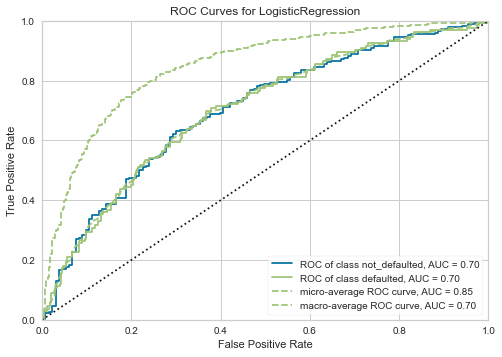

AttributeError: 'LogisticRegression' object has no attribute 'binary'

AttributeError: 'LogisticRegression' object has no attribute 'binary'

In [10]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.datasets import load_credit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Load the classification dataset
X, y = load_credit()

#Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.98, stratify=y, random_state=42)

# Instantiate the visualizer with the classification model
model = LogisticRegression()
roc_auc(model, X_train, y_train, X_test=X_test, y_test=y_test, classes=['not_defaulted', 'defaulted'])

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

proba_predictions = model.predict_proba(X_test)
preds_0 = proba_predictions[:, 0]
preds_1 = proba_predictions[:, 1]
targets = y_test

# returns tpr, fpr, thresholds
p0_roc = roc_curve(1-targets, preds_0)
p1_roc = roc_curve(targets, preds_1)

all_thresholds = np.unique(np.hstack((p0_roc[2], p1_roc[2])))
# sort greatest to least
all_thresholds.sort()
all_thresholds = all_thresholds[::-1]

micro_tpr = []
micro_fpr = []
macro_tpr = []
macro_fpr = []
macro_tpr2 = []
macro_fpr2 = []
p0_tpr_list = []
p0_fpr_list = []
p1_tpr_list = []
p1_fpr_list = []
for t in tqdm(all_thresholds):
    p0_preds = preds_0 < t
    p1_preds = preds_1 >= t
    tn0, fp0, fn0, tp0 = confusion_matrix(1-targets, 1-p0_preds).ravel()
    tn1, fp1, fn1, tp1 = confusion_matrix(targets, p1_preds).ravel()
    # tpr = TP/(TP+FN)
    # fpr = FP/(FP+TN)
    micro_tpr.append((tp0 + tp1) / (tp0 + tp1 + fn0 + fn1))
    micro_fpr.append((fp0 + fp1) / (fp0 + fp1 + tn0 + tn1))
    p0_tpr = tp0 / (tp0 + fn0)
    p1_tpr = tp1 / (tp1 + fn1)
    p0_fpr = fp0 / (fp0 + tn0)
    p1_fpr = fp1 / (fp1 + tn1)
    p0_tpr_list.append(p0_tpr)
    p0_fpr_list.append(p0_fpr)
    p1_tpr_list.append(p1_tpr)
    p1_fpr_list.append(p1_fpr)
    macro_tpr.append((p0_tpr + p1_tpr) / 2)
    macro_fpr.append((p0_fpr + p1_fpr) / 2)
    
    # this is actually the same as micro avg
    macro_tp = (tp0 + tp1) / 2
    macro_fn = (fn0 + fn1) / 2
    macro_fp = (fp0 + fp1) / 2
    macro_tn = (tn0 + tn1) / 2
    macro_tpr2.append(macro_tp / (macro_tp + macro_fn))
    macro_fpr2.append(macro_fp / (macro_fp + macro_tn))

100%|███████████████████████████████████████████████████████████████████████████████| 365/365 [00:01<00:00, 265.84it/s]


In [65]:
print(roc_auc_score(1-targets, preds_0))
print(roc_auc_score(targets, preds_1))

0.7010835439777173
0.7010835439777172


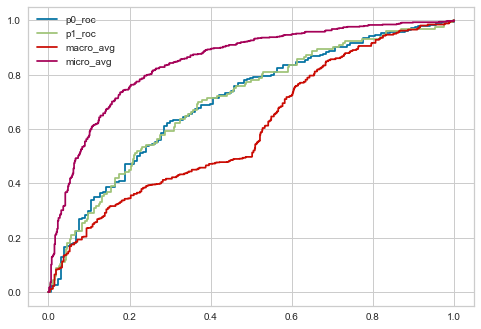

In [71]:
# fpr on x, tpr on y
plt.plot(p0_roc[0], p0_roc[1], label='p0_roc')
plt.plot(p1_roc[0], p1_roc[1], label='p1_roc')
plt.plot(macro_fpr, macro_tpr, label='macro_avg')
# plt.plot(macro_fpr2, macro_tpr2, label='macro_avg2')
plt.plot(micro_fpr, micro_tpr, label='micro_avg')
plt.legend()